<a href="https://colab.research.google.com/github/mishanyacorleone/machinelearning/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Начинаем работу с данными

Какие могут быть возможные проблемы с данными, которые мы будем нейтрализовать?
1. Runtime может быть аномальным (значения меньше 0, огромные значения)
2. IMDB Score может быть аномальным (слишком высокие оценки, нереальные оценки, оценки меньше 0)
3. Premiere может быть в тот день, который ещё не наступил. Для этого представим дату в виде unix time

### Устраним проблемы с Runtime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Анализ/lab7/movie_data.csv')
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Professor Bar Candidate,Comedy,"February 03, 2024",144.0,4.3,Hindi
1,Describe Fill Image,Mystery,"June 16, 2021",116.0,4.0,English
2,Along Interview Me,Horror,"December 18, 2021",144.0,1.8,Hindi
3,Feeling Piece Race,Comedy,"March 11, 2024",114.0,4.9,Italian
4,Close Imagine True,Drama,"November 15, 2021",125.0,1.3,Spanish


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2997 non-null   object 
 1   Genre       2996 non-null   object 
 2   Premiere    2998 non-null   object 
 3   Runtime     2996 non-null   float64
 4   IMDB Score  2999 non-null   object 
 5   Language    2995 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
data.describe(include='all')

,Title,Genre,Premiere,Runtime,IMDB Score,Language
count,2997,2996,2998,2996.000000,2999,2995
unique,2993,12,1337,NaN,51,7
top,Question Across Will,Romance,"September 21, 2020",NaN,3.4,Chinese
freq,3,398,8,NaN,94,510
mean,NaN,NaN,NaN,103.196195,NaN,NaN
std,NaN,NaN,NaN,145.190509,NaN,NaN
min,NaN,NaN,NaN,-53.000000,NaN,NaN
25%,NaN,NaN,NaN,75.000000,NaN,NaN
50%,NaN,NaN,NaN,100.000000,NaN,NaN
75%,NaN,NaN,NaN,125.000000,NaN,NaN


<Axes: title={'center': 'Runtime of Movies'}>

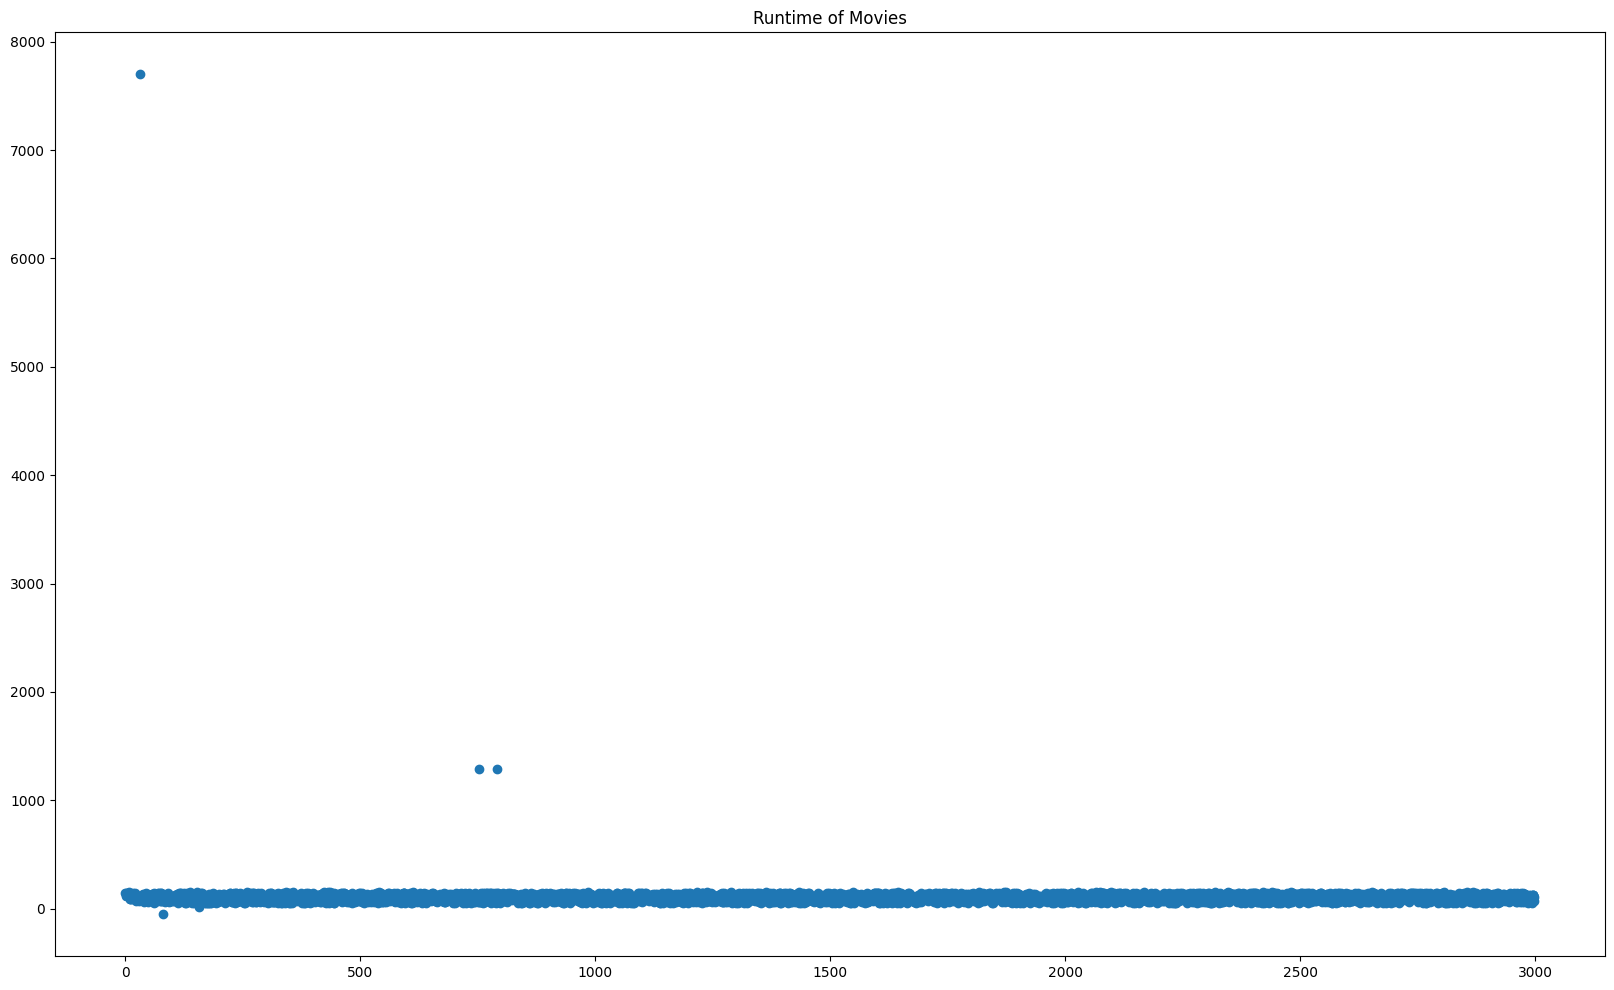

In [ ]:
data['Runtime'].plot(style='o', figsize=(20, 12), title='Runtime of Movies')


In [ ]:
data['Runtime'] = np.where(data['Runtime'] > 1000, data['Runtime'].mean(), data['Runtime'])
data['Runtime'] = np.where(data['Runtime'] < 0, data['Runtime'] * -1, data['Runtime'])

In [ ]:
data['Runtime'].describe()

count    2996.000000
mean       99.903668
std        29.194294
min         9.800000
25%        75.000000
50%       100.000000
75%       125.000000
max       149.000000
Name: Runtime, dtype: float64

<Axes: title={'center': 'Runtime of Movies'}>

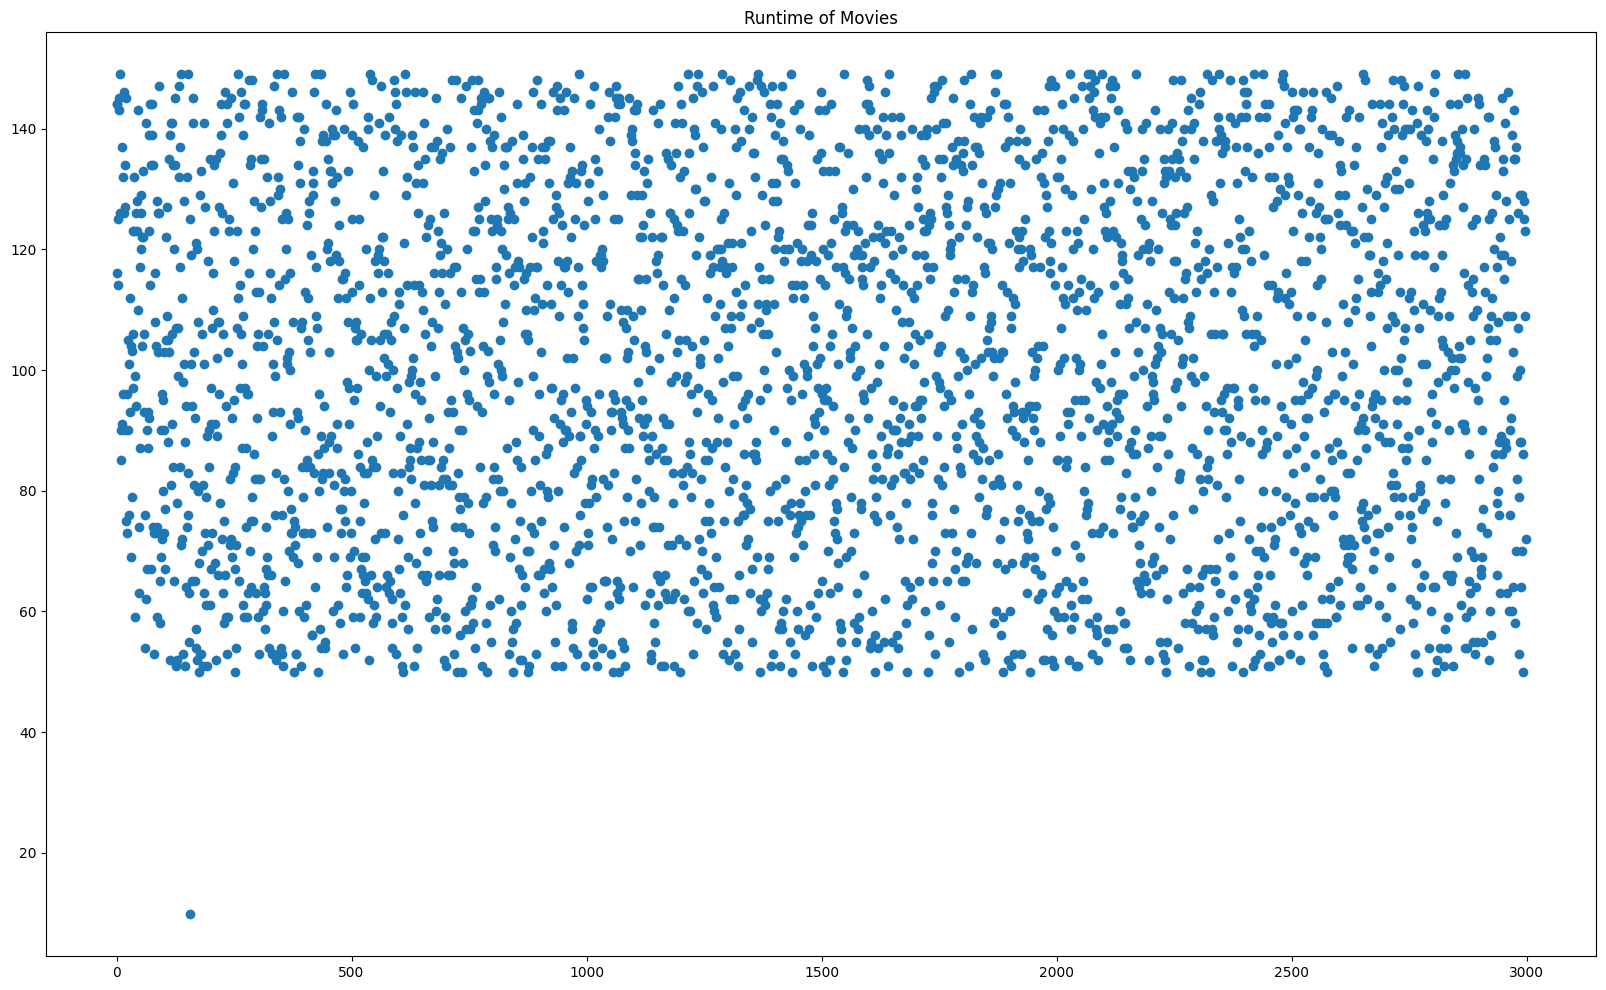

In [ ]:
data['Runtime'].plot(style='o', figsize=(20, 12), title='Runtime of Movies')

In [ ]:
data.drop(data.loc[data['Runtime'] == 9.8].index, inplace=True)

In [ ]:
data['Runtime'].describe()

count    2995.000000
mean       99.933752
std        29.152683
min        50.000000
25%        75.000000
50%       100.000000
75%       125.000000
max       149.000000
Name: Runtime, dtype: float64

### Устраним проблему с IMDB Score

In [ ]:
import re

regex = r'[^0-9.]'

data['IMDB Score'] = data['IMDB Score'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '.', x)).astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2997 non-null   object 
 1   Genre       2999 non-null   int64  
 2   Premiere    2998 non-null   object 
 3   Runtime     2996 non-null   float64
 4   IMDB Score  2999 non-null   float64
 5   Language    2999 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 140.7+ KB


In [ ]:
data['IMDB Score'].describe()

count    2999.000000
mean        3.490474
std        16.470246
min         0.333000
25%         2.000000
50%         3.000000
75%         4.000000
max       700.000000
Name: IMDB Score, dtype: float64

<Axes: title={'center': 'IMDB Score of Movies'}>

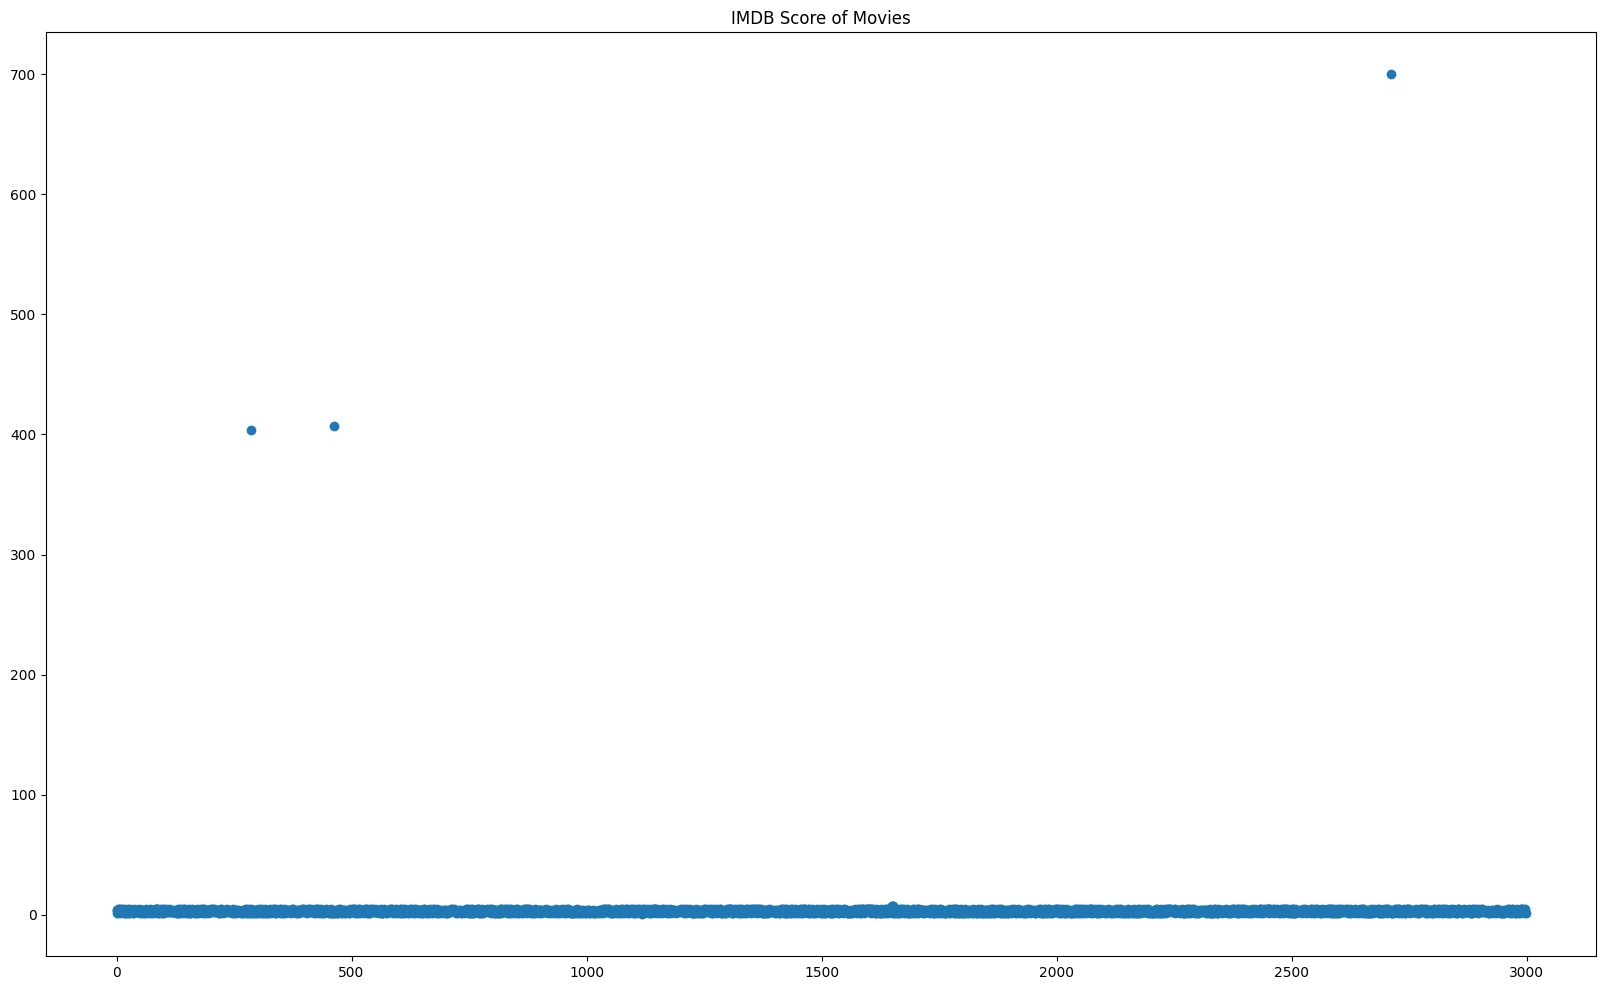

In [ ]:
data['IMDB Score'].plot(style='o', figsize=(20, 12), title='IMDB Score of Movies')

In [ ]:
data['IMDB Score'] = np.where(data['IMDB Score'] > 10, data['IMDB Score'].mean(), data['IMDB Score'])

In [ ]:
data['IMDB Score'].describe()

count    2998.000000
mean        2.990362
std         1.178136
min         0.333000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: IMDB Score, dtype: float64

### Устраним проблему с Premiere

In [ ]:
from datetime import datetime

In [ ]:
def preprocessing_date(x):
  try:
    return int(datetime.strptime(x, "%B %d, %Y").timestamp())
  except Exception:
    return x

In [ ]:
data['Premiere'] = data['Premiere'].apply(lambda x: preprocessing_date(x))

In [ ]:
rows_to_drop = list()
for index, row in data.iterrows():
  if type(row['Premiere']) != int:
    print(row['Premiere'])
    rows_to_drop.append(index)
  elif row['Premiere'] > int(datetime.now().timestamp()):
    print(row['Premiere'])
    rows_to_drop.append(index)

data.drop(rows_to_drop, inplace=True)

1918512000
4839436800
nan
July 42, 2023
7993728000


In [ ]:
for row in data['Premiere']:
  if type(row) != int:
    print(row)

In [ ]:
for row in data['Premiere']:
  if row > int(datetime.now().timestamp()):
    print(row)

In [ ]:
datetime.utcfromtimestamp(data['Premiere'].min())

datetime.datetime(2020, 1, 1, 0, 0)

### Устраним проблему с Genre

In [ ]:
data['Genre'].unique()

array(['Comedy', 'Mystery', 'Horror', 'Drama', 'Action', 'Romance',
       'Documentary', 'Thriller', 'Horror\\', 'Comedy-', 'Mstery', nan,
       'Horr'], dtype=object)

In [ ]:
data['Genre'] = data['Genre'].replace({'Horr': 'Horror', 'Horror\\': 'Horror', 'Comedy-': 'Comedy', 'Mstery': 'Mystery'})
data['Genre'] = data['Genre'].fillna('Unknown genre')

In [ ]:
data['Genre'].value_counts()

Genre
Romance          398
Comedy           391
Action           379
Horror           371
Drama            366
Documentary      366
Thriller         362
Mystery          357
Unknown genre      3
Name: count, dtype: int64

In [ ]:
data['Genre'].unique()

array(['Comedy', 'Mystery', 'Horror', 'Drama', 'Action', 'Romance',
       'Documentary', 'Thriller', 'Unknown genre'], dtype=object)

### Устраним проблему с Language

In [ ]:
data['Language'].unique()

array(['Hindi', 'English', 'Italian', 'Spanish', 'Japanese', 'Chinese',
       'Italia', nan], dtype=object)

In [ ]:
data['Language'] = data['Language'].replace('Italia', 'Italian')
data['Language'] = data['Language'].fillna('Multilanguage')

In [ ]:
data['Language'].unique()

array(['Hindi', 'English', 'Italian', 'Spanish', 'Japanese', 'Chinese',
       'Multilanguage'], dtype=object)

In [ ]:
data['Language'].value_counts()

Language
Hindi            509
Chinese          509
English          498
Japanese         498
Spanish          489
Italian          487
Multilanguage      3
Name: count, dtype: int64

## Выявление аномалий с помощью функции

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Анализ/lab7/movie_data.csv')
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Professor Bar Candidate,Comedy,"February 03, 2024",144.0,4.3,Hindi
1,Describe Fill Image,Mystery,"June 16, 2021",116.0,4.0,English
2,Along Interview Me,Horror,"December 18, 2021",144.0,1.8,Hindi
3,Feeling Piece Race,Comedy,"March 11, 2024",114.0,4.9,Italian
4,Close Imagine True,Drama,"November 15, 2021",125.0,1.3,Spanish


In [ ]:
data['Genre'] = data['Genre'].factorize()[0]
data['Language'] = data['Language'].factorize()[0]

In [ ]:
import re

regex = r'[^0-9.]'

data['IMDB Score'] = data['IMDB Score'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '.', x)).astype(float)

In [ ]:
from datetime import datetime

In [ ]:
def preprocessing_date(x):
  try:
    return int(datetime.strptime(x, "%B %d, %Y").timestamp())
  except Exception:
    return x

In [ ]:
data['Premiere'] = data['Premiere'].apply(lambda x: preprocessing_date(x))

In [ ]:
rows_to_drop = list()
for index, row in data.iterrows():
  if type(row['Premiere']) != int:
    print(row['Premiere'])
    rows_to_drop.append(index)

data.drop(rows_to_drop, inplace=True)

nan
July 42, 2023


In [ ]:
data_features = data.drop(columns=['Title'])

In [ ]:
data_features = data_features.dropna()

In [ ]:
data_features

,Genre,Premiere,Runtime,IMDB Score,Language
0,0,1706918400,144.0,4.3,0
1,1,1623801600,116.0,4.0,1
2,2,1639785600,144.0,1.8,0
3,0,1710115200,114.0,4.9,2
4,3,1636934400,125.0,1.3,3
...,...,...,...,...,...
2994,7,1645056000,125.0,3.9,4
2995,1,1666310400,128.0,4.4,2
2996,3,1672185600,123.0,1.6,3
2997,0,1665532800,109.0,4.7,5


### outlier_std

In [ ]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
    return anomalies, up_bound, low_bound

### outlier_iqr

In [ ]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
    return anomalies, up_bound, low_bound

In [ ]:
def get_column_outliers(data, function, columns=None, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns

    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True

    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)

    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [ ]:
# def get_anomalies(data, function, del_anomaly: bool):
#   comparison_table, std_outliers = get_column_outliers(data, function)
#   indexes = list(std_outliers[std_outliers == True].index)
#   if not del_anomaly:
#     return indexes
#   data = data.drop(indexes)
#   return data

In [ ]:
# data = get_anomalies(data_features, outlier_std, True)
# data.info()

In [ ]:
comparison_table, std_outliers = get_column_outliers(data_features, outlier_std)
anomalies_report(std_outliers)

Total number of outliers: 9
Percentage of outliers:   0.30%


In [ ]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 9
Percentage of outliers:   0.30%


### Кластеризация

#### Distance-based

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:

    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)

    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [ ]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features),
    columns=data_features.columns
)

In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean')
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 300
Percentage of outliers:   10.02%


In [ ]:
citiblock_model = DistanceOutliers(metric='cityblock')
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 300
Percentage of outliers:   10.02%


## DB-SCAN

In [ ]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [ ]:
eps

0.49999999999999994

In [ ]:
anomalies_report(density_outlier)

Total number of outliers: 43
Percentage of outliers:   1.44%


#### OneClass SVM

In [ ]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [ ]:
anomalies_report(svm_outliers)

Total number of outliers: 153
Percentage of outliers:   5.11%


#### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [ ]:
anomalies_report(isolation_outliers)

Total number of outliers: 150
Percentage of outliers:   5.01%


# Финальное сравнение

In [ ]:
summary = np.concatenate((
    [std_outliers],
    [iqr_outliers],
    [euclidian_outliers],
    [cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2997 and the array at index 2 has size 2994